* * *
<pre> NYU Paris            <i> Machine Learning - Spring 2023 </i></pre>
* * *


<h1 align="center"> Lab Unsupervised learning: clustering </h1>

<pre align="left"> April 05th 2022               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- More practice with numpy and matplotlib
- Understand the pros and cons of K-means clustering, hierarchical clustering and GMM

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn.metrics
import numpy as np
import math
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)


seed = 42

# Part 1: Implementing K-means

In the past labs, we have mainly seen:
- dimension reduction (with PCA)
- classification (i.e supervised learning)

In practice however, the vast majority of data does not have labels. Finding structure and patterns in data without labels is called unsupervised learning. Given a specified number of clusters K, the K-means algorithm forms a partition of your data with K different groups while trying to:
- minimize the variance within groups (i.e samples forming a group must be close to each other)
- maximize the variance between groups (i.e groups must be far from each other).

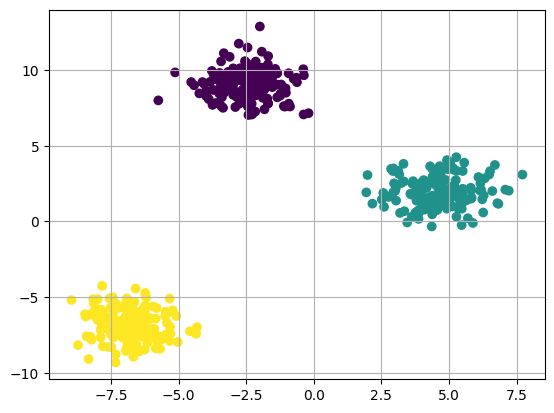

In [13]:
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers=3, n_features=2, cluster_std=1., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()




It is called K-means because it only consists of two steps. Starting from an initialization of K mean values $M_k$:
- For each sample $x$ of your data, find the mean (centroid) $C_k$ that is closest to x. Assign $x$ to group $k$.
- Update the mean $C_k$ of each group k

### Question 1
Write a function that generates K random initializations for the group centroids $C_k$. 

In [61]:
def init_centroids(K, dimension=2):
    centroids = np.random.rand(K, dimension)
    return centroids

### Question 2
Write a function that takes the data X (n, d) and returns an array (n,) containing the id of the cluster it should be assigned to. For example, the function returns [0, 0, 2, 1, 2] if the first two samples are assigned to cluster 0, the 3rd and 5th samples to cluster 2 and the 4th sample to cluster 1. 

_Hint: look up `sklearn.metrics.pairwise_distances` and the numpy method of an array `array.argmin`_

In [62]:
from sklearn.metrics import pairwise_distances
def assign_labels(X, centroids):
    distances = pairwise_distances(X, centroids)
    labels = np.argmin(distances, axis = 1)
    return labels

### Question 3
The following cell visualizes the centroids and their assigned samples. Initialize the centroids and compute a first set of labels of your data and visualize them. Can you think of a smarter way to initialize these centroids using the data ? (No need to implement it for now).

In [63]:
def plot_kmeans(X, labels, centroids):
    K = len(centroids)
    colors = np.array(cm.Set1(np.linspace(0., 1, K)))
    plt.figure()
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels], s=4, alpha=0.3)
    plt.scatter(centroids[:, 0], centroids[:, 1], color=colors, marker="^", s=100)
    plt.show()


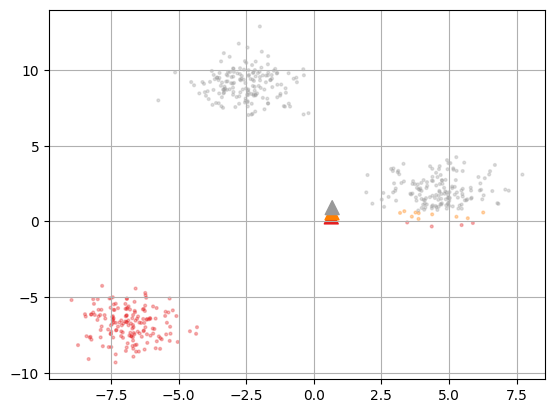

In [64]:
centroids = init_centroids(3, 2)
labels = assign_labels(X, centroids)
plot_kmeans(X, labels, centroids)

Indeed there are smarter ways to initilize the centroids. In this paper, sklearn's initialization method is explained [Link](https://dl.acm.org/doi/10.5555/1283383.1283494#:~:text=The%20k%2Dmeans%20method%20is,are%20very%20appealing%20in%20practice). The general idea is to randomly pick the centroids from the set of datapoints, given a certain probability distribution. This distribution is updated iteratively and is dependent on the distance between the candidate centroid and the previous centroids. In this way, centroids farther away from the rest have greater probability of being picked.

The algorithm is as follows :

1a. Choose an initial center $c_1$ uniformly at random from $X$.

1b. Choose the next center $c_i$, selecting $c_i = x' \in X$ with probability $\frac{D(x')^2}{\sum_{x ∈ X}{D(x)^2}}$

1c. Repeat Step 1b until we have chosen a total of k centers.

Where $D(x)$ denotes the shortest distance from a data point $x$ to the closest center we have already chosen

### Question 4
Write a function that computes the new centroids using the assigned labels. Visualize the new centroids. Repeat these steps (label assignment + centroid update) for 2-3 steps. Does it converge ?

In [65]:
def update_centroids(X, labels, centroids):
    for k in range(len(centroids)):
        centroids[k] = X[labels == k].mean(axis= 0)
        
        if all(math.isnan(x) for x in centroids[k]):
            centroids[k] = np.random.rand(len(centroids[k]))

    return centroids

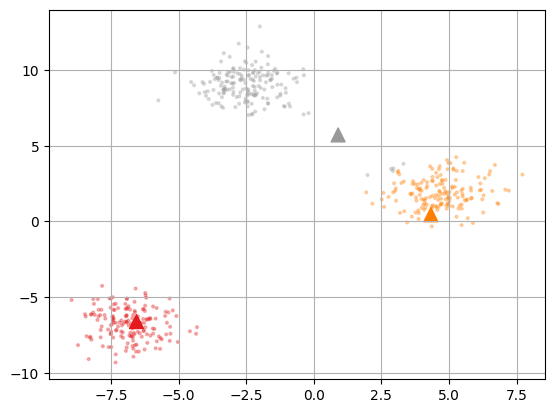

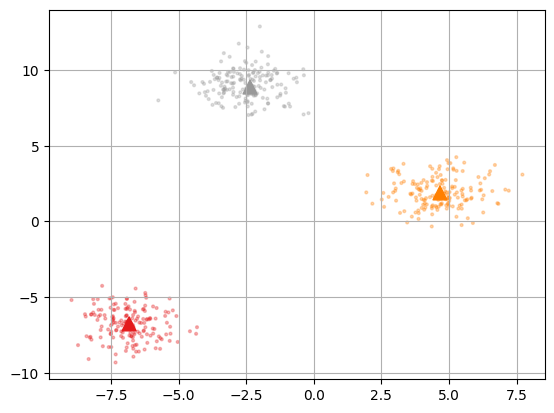

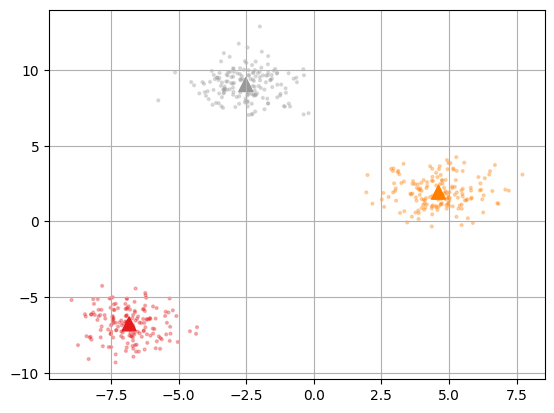

In [66]:
for _ in range(3):
    centroids = update_centroids(X, labels, centroids)
    labels = assign_labels(X, centroids)
    plot_kmeans(X, labels, centroids)

We can see that the centroids converged in the third step (the first being the centroid intialization on the cell above) becasue the centroids did not update values in the next iteration.

### Question 5
The K-means algorithm repeats these operations until the centroids stop changing. Write a function summing up all these operations.

In [9]:
def Kmeans(X, K=3, maxiter=100, plot_steps=False):
    dimension = X.shape[1]
    
    centroids = init_centroids(K, X.shape[1])
    centroids_control = np.copy(centroids)
    labels = assign_labels(X, centroids)

    for ii in range(maxiter):
        centroids = update_centroids(X, labels, centroids)
        labels = assign_labels(X, centroids)
        
        if  np.array_equiv(centroids, centroids_control):
            break
            
        if plot_steps:
            plot_kmeans(X, labels, centroids)
        
        centroids_control = np.copy(centroids)

    return labels, centroids


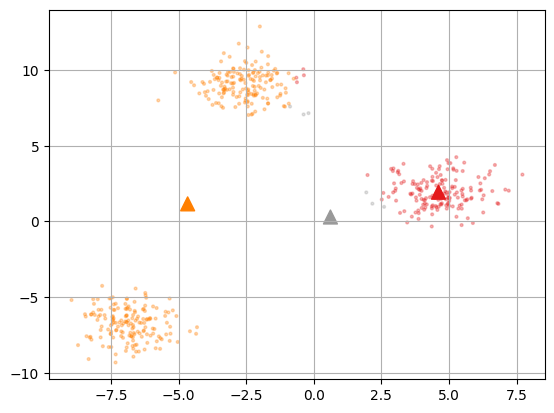

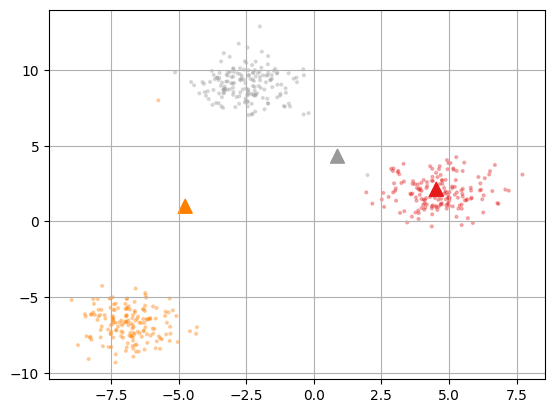

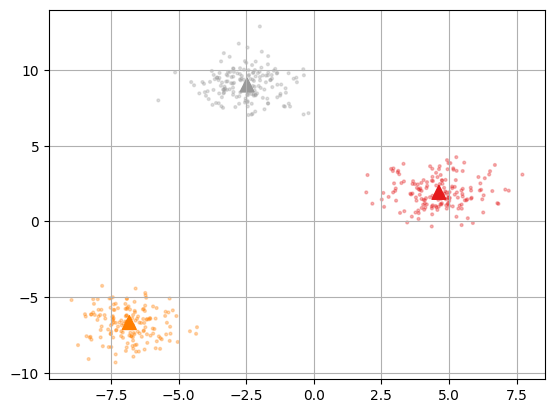

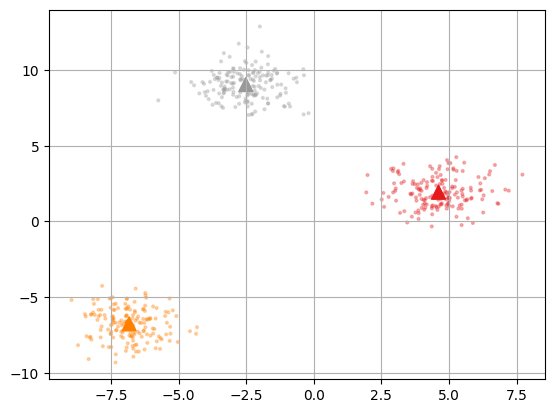

(array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
        0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
        2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
        0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
        0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
        1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
        2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
        2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
        1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
        0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
        2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
        0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
        0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 

In [10]:
Kmeans(X, K = 3, plot_steps = True)

### Question 6

Generate different sets of data examples (changing the `cluster_std` parameter) and visualize the K-means output. What do you notice ? 

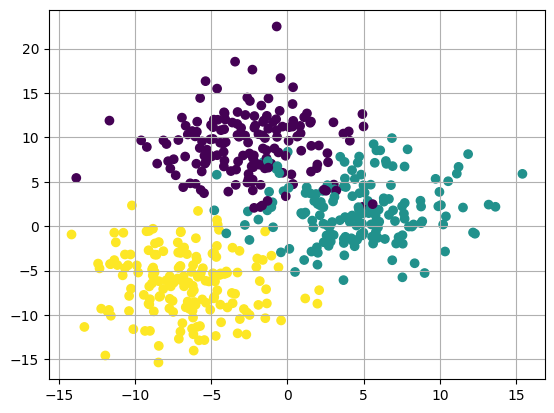

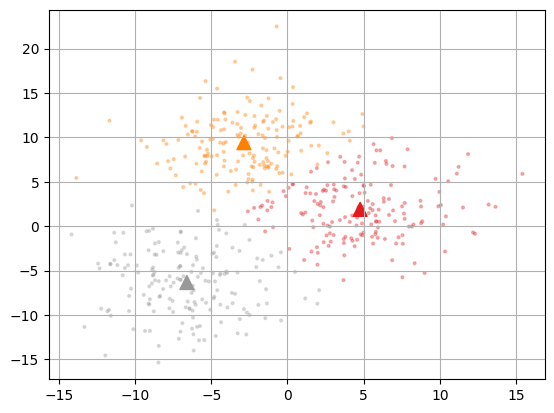

In [11]:
X, y = make_blobs(500, centers=3, n_features=2, cluster_std=3.5, random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

labels, centroids = Kmeans(X, K=3, maxiter=100, plot_steps=False)
plot_kmeans(X, labels, centroids)

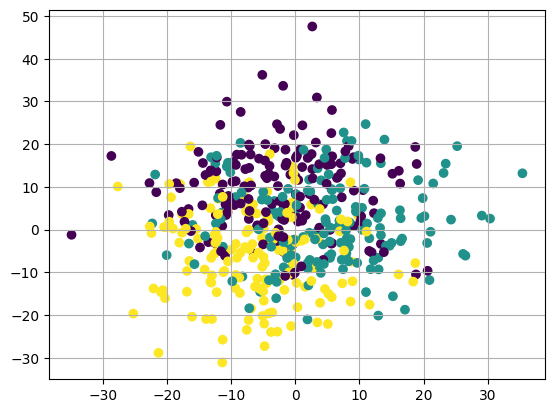

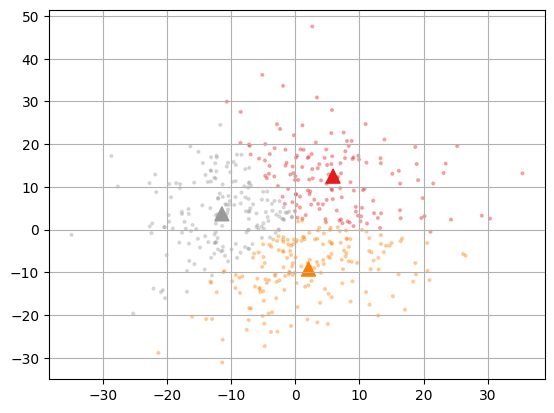

In [12]:
X, y = make_blobs(500, centers=3, n_features=2, cluster_std=10., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

labels, centroids = Kmeans(X, K=3, maxiter=100, plot_steps=False)
plot_kmeans(X, labels, centroids)

We can notice that the K mean classifiers performs less accurately as the cluster_std (standard deviation) parameter increases. This is because the data no longer is grouped into separated and distingushable clusters.

### Question 7
Try Kmeans with this new data. Choose K wisely. Is it normal that Kmeans fails ?

In [13]:
from sklearn.datasets import make_circles

X, y = make_circles(500, noise=0.1, factor=0.2)


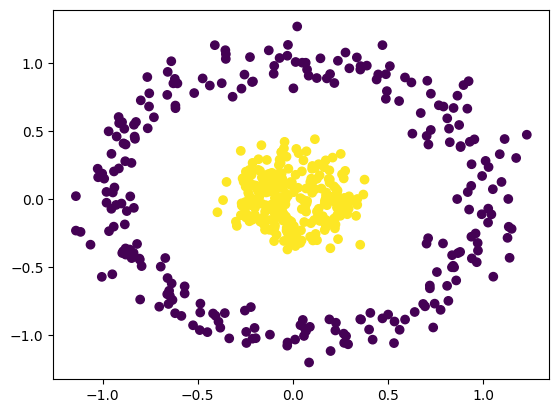

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y)


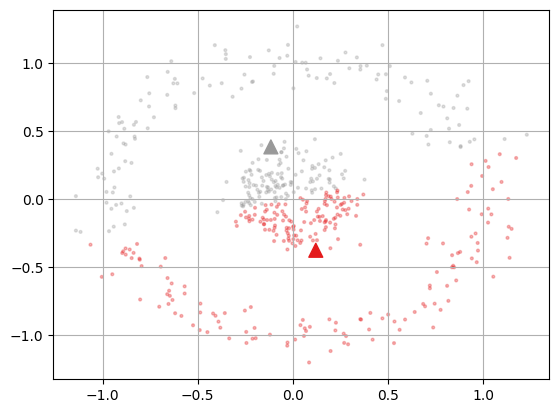

In [15]:
labels, centroids = Kmeans(X, K=2, maxiter=100, plot_steps=False)

plot_kmeans(X, labels, centroids)

It is only natural that the 2-mean classifier does not work for this dataset as the labels are not distributed in clusters. Rather, they are scattered as two concentirc circumferences. There is no way to place the centroids so that it properly classifies the data. 

Clearly must be equal to k=2 because of the original data labeling.

# Part 2: Compressing images with K-means
Is it often the case that data is redundant. Take the example of the image below:

Image original shape:  (427, 640, 3)
Flower colors shape:  (273280, 3)


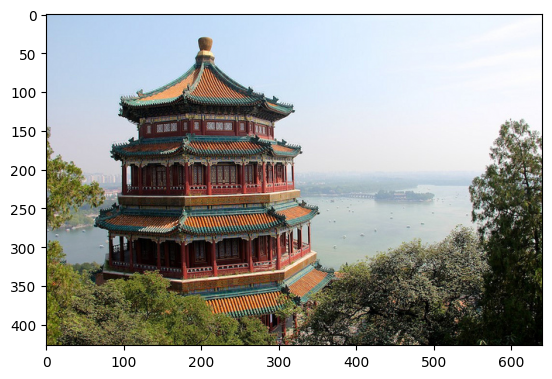

In [16]:
from sklearn.datasets import load_sample_image

flower = load_sample_image('china.jpg') / 255
flower_shape = flower.shape
flower_colors = flower.reshape(-1, 3)

print("Image original shape: ", flower_shape)
print("Flower colors shape: ", flower_colors.shape)

max_color = flower.max()

plt.figure()
plt.imshow(flower)
plt.show()

### Question 8
We would like to replace all colors by replacing them with the centroid they're closest to. Let's for example reduce them to 16. Run the Kmeans algorithm with K=16 on the downsampled colors array X. Then create a new image with the replaced colors and visualize it.

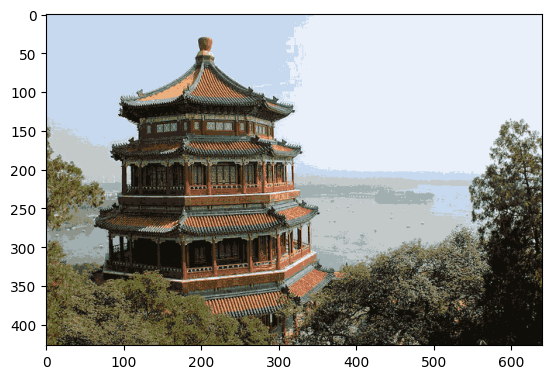

In [74]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
X = shuffle(flower_colors, random_state=0, n_samples=1_000)

labels, centroids = Kmeans(X, K=16, maxiter=100, plot_steps=False)

flower_color_pred = centroids[assign_labels(flower_colors, centroids)] 
plt.figure()
plt.imshow(flower_color_pred.reshape(flower_shape))
plt.show()



### Question 9
Play around with the value of n_clusters (K). What do you notice ?

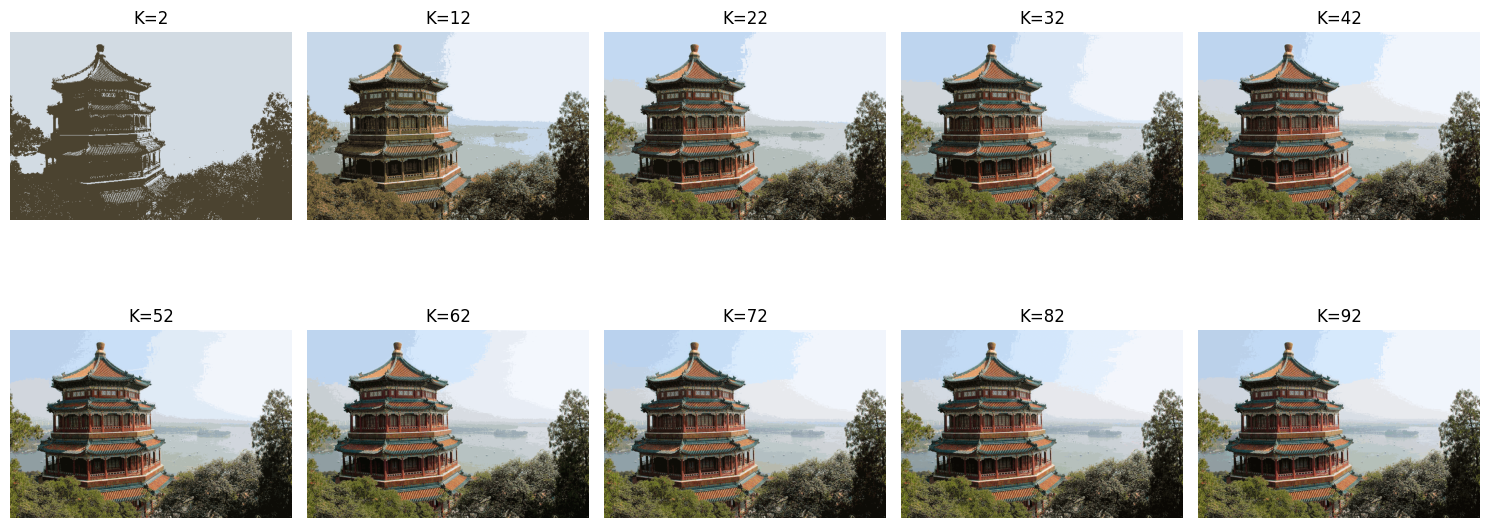

In [67]:
X_plot = shuffle(flower_colors, random_state=0, n_samples=1_000)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
axes = axes.flatten()

#Loop through the values of K and plot the corresponding clusterings

for i, k in enumerate(range(2, 100, 10)):
    labels, centroids = Kmeans(X_plot, K=k, maxiter=100, plot_steps=False)

    flower_color_pred = centroids[assign_labels(flower_colors, centroids)].reshape(flower_shape)
    axes[i].imshow(flower_color_pred)
    axes[i].set_title(f'K={k}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Clearly, as we increase the dimensions, we see the image becomes more and more detailed. This is because K represent the number of colors used in the recoloring. Then, if k is small, points with similar enough colors (in the original image) are assigned the same value, so the number of details decreases. If there is a lot of colors, those points are differentiated.

### Question 10
Try this out but using the sklearn implementation of Kmeans. Do you obtain similar results ? Can you explain the difference ?

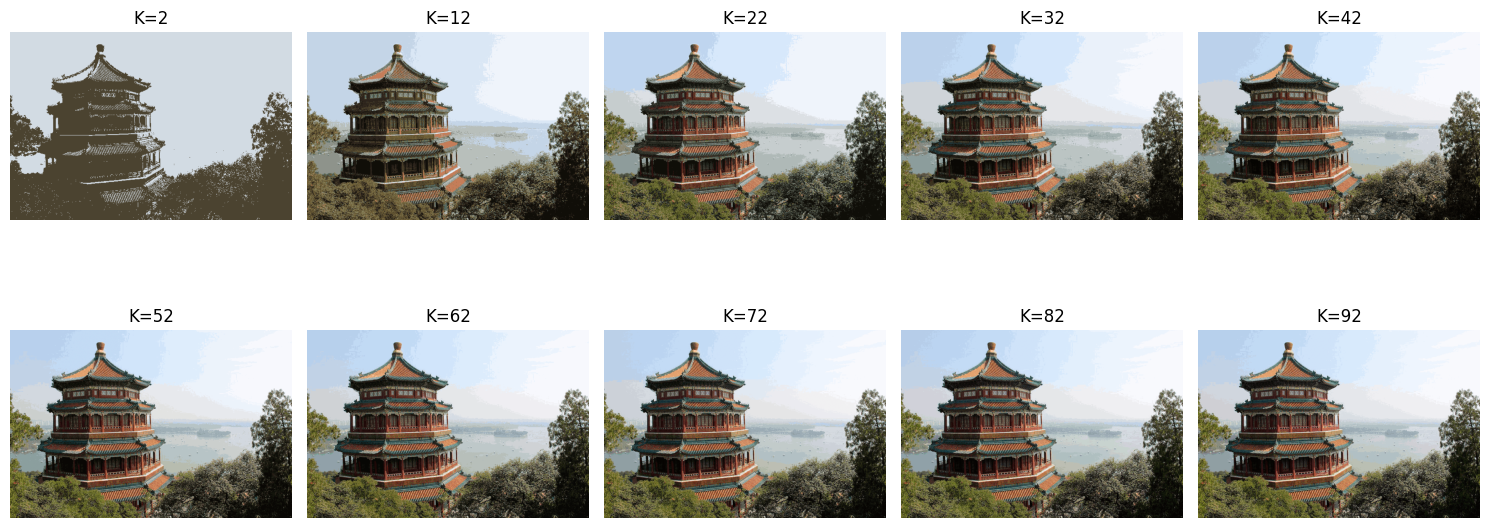

In [70]:
from sklearn.cluster import KMeans as KM

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
axes = axes.flatten()

for i, k in enumerate(range(2, 100, 10)):
    kmean = KM(n_clusters=k, n_init=10)
    kmean.fit(X_plot)
    flower_colors_sk = kmean.cluster_centers_[np.argmin(kmean.transform(flower_colors), axis = 1)].reshape(flower_shape)
    axes[i].imshow(flower_colors_sk)
    axes[i].set_title(f'K={k}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Let's check the counts for each centroid in both implementations to see how different the results actually are. For that, we are just going to take one sample. K=16.

In [79]:
from collections import Counter

k = 16

_, centroids = Kmeans(X, K=k, maxiter=100, plot_steps=False)
my_labels = assign_labels(flower_colors, centroids)
kmean = KM(n_clusters=k)
kmean.fit(X)
sk_labels = np.argmin(kmean.transform(flower_colors), axis = 1)

my_counter = Counter(my_labels)
my_freq_dist = {label: count/len(my_labels) for label, count in my_counter.items()}
sk_counter = Counter(sk_labels)
sk_freq_dist = {label: count/len(sk_labels) for label, count in sk_counter.items()}

print(dict(sorted(Counter(my_counter).items(), key=lambda item: item[1])))
my_variance = np.mean((np.abs(list(my_freq_dist.values()) - np.mean(list(my_freq_dist.values()))))**2)
print()
print(dict(sorted(Counter(sk_counter).items(), key=lambda item: item[1])))
sk_variance = np.mean((np.abs(list(sk_freq_dist.values()) - np.mean(list(sk_freq_dist.values()))))**2)

#print nomarlized variance
print(f"\n\n\n\nvariance of my_km = {my_variance}")
print(f"variance of sk_km = {sk_variance}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{4: 2689, 10: 2739, 7: 3615, 12: 8596, 9: 8846, 15: 8851, 6: 9109, 11: 9341, 0: 10277, 8: 10395, 2: 16964, 14: 18688, 1: 26755, 13: 27473, 5: 45916, 3: 63026}

{14: 3492, 10: 5093, 2: 8570, 13: 8839, 8: 9847, 4: 10313, 15: 10658, 12: 13280, 3: 15291, 11: 17670, 5: 18725, 7: 25716, 1: 27082, 6: 27435, 9: 28876, 0: 42393}




variance of my_km = 0.0034837169270724427
variance of sk_km = 0.0014147003742740628


The differences in the counts is explained by the centroid initialization of the two implementations. We know that the K-mean algorithm is sensible to the initial state of the centroids, so initializing at different values produce different results. Sk learns initializes the centroids based on the empirical probability distribution of the points. In our k-mean, we initialize the centroids with gaussian randomness.

# Part 3: Implementing  Hierarchical clustering


## Question 11

Implement a function that compute the distance matrix between data. The parameter 'distance' define the chosen distance on the Euclidean space. You can use functions from scipy or sklearn. Implement three distances of your choice.

In [14]:
def distance_matrix(X, distance='euclidean'):
    matrix = np.linalg.norm(X[:, None ,:]-X[None, :, :], axis = -1) 
    return matrix

## Question 12

Implement diffent similarity functions between clusters that you have seen in class (Linkage slide). Regarding the question 13, find a clever way to implement cluster variable (cluster1, cluster2).

In [15]:
def cluster_similarity(cluster1, cluster2, X, matrix_distance, linkage):
    pairs = list(product(cluster1, cluster2))
    x, y = zip(*pairs)
    similarity = 0
    if linkage == 'single':
        similarity = np.min(matrix_distance[x, y]) 
    elif linkage == 'complete':
        similarity = np.max(matrix_distance[x, y]) 
    elif linkage == 'centroid':
        x_var1 = X[cluster1].mean(axis=0)
        x_var2 = X[cluster2].mean(axis=0)
        similarity = np.linalg.norm(x_var2-x_var1)
    elif linkage == 'average':
        similarity = np.sum(matrix_distance[x, y])/(len(cluster1)*len(cluster2))
        
    return similarity

In [16]:
linkages = ['single', 'complete', 'centroid', 'average']

## Question 13

Implement a function that performs Agglomerative Hierarchical Clustering.

In [17]:
from itertools import product
def generate_pairs(x, y):
    l1 = range(x)
    l2 = range(y)
    return ((x, y) for x, y in product(l1, l2) if x != y and x > y)

In [18]:
def agglo_hier_clust(X, linkage, target = 3):
    clusters = list(np.arange(0, X.shape[0]).reshape(-1, 1))
    matrix_distance = distance_matrix(X)
    

    while len(clusters) > target:
        min_x = min_y = 0
        min_similarity = float('inf')
        N = len(clusters)
        pairs = generate_pairs(N, N)
        
        for pair in pairs:
            cluster1 = clusters[pair[0]]
            cluster2 = clusters[pair[1]]
            cur_similarity = cluster_similarity(cluster1, cluster2, X, matrix_distance, linkage)
            if (cur_similarity < min_similarity):
                min_similarity = cur_similarity
                min_x = pair[0]
                min_y = pair[1]
            
        clusters[min_x] = np.concatenate((clusters[min_x], clusters[min_y]), axis = 0)
        del clusters[min_y]
    
    for c in clusters:
        c.sort()
    
    return clusters


## Question 14 (Bonus)

Implement a function that performs Divisive Hierarchical Clustering.

In [19]:
def divisive_hier_clust(X, linkage, threshold):
    clusters = [np.array(np.arange(0, X.shape[0]))]
    matrix_distance = distance_matrix(X)
    hierarchy = []
    n = X.shape[0]

    while True:
        max_distance = 0
        max_cluster_idx = 0
        max_x = 0
        max_y = 0

        for i in range(len(clusters)):
            cluster = clusters[i]
            leng = len(cluster)
            for pair in generate_pairs(leng, leng):
                c_x = cluster[pair[0]]
                c_y = cluster[pair[1]]
                if matrix_distance[c_x][c_y] > max_distance:
                    max_cluster_idx = i
                    max_x = pair[0]
                    max_y = pair[1]
                    max_distance = matrix_distance[c_x][c_y]

        if max_distance < threshold: 
            break
            
        max_cluster = clusters[max_cluster_idx]
        cluster_a = []
        cluster_b = []
        
        for point in clusters[max_cluster_idx]:
            focal_a = max_cluster[max_y]
            focal_b = max_cluster[max_x]

            if matrix_distance[point][focal_a] < matrix_distance[point][focal_b]:
                cluster_a.append(point)
            else:
                cluster_b.append(point)
                
        del clusters[max_cluster_idx]
        clusters.append(np.array(cluster_a))
        clusters.append(np.array(cluster_b))

    return clusters

## Question 15

Apply this (or these) algorithm(s) on the Gaussian blobs. Comment the results

In [20]:
X, y = make_blobs(20, centers=3, n_features=2, cluster_std=1., random_state=seed)


In [21]:
print(f'actual clusters = {[ np.array([el for el in range(len(y)) if y[el] == i]) for i in range(3)]}')

print(f'\nagglo cluster = { agglo_hier_clust(X, "single", 3 )} ')

print(f'\ndivisive cluster = {divisive_hier_clust(X, "single", 4)}')


actual clusters = [array([ 0,  1,  2,  3,  6, 13, 15]), array([ 4,  7,  8,  9, 11, 18, 19]), array([ 5, 10, 12, 14, 16, 17])]

agglo cluster = [array([ 0,  1,  2,  3,  6, 13, 15]), array([ 5, 10, 12, 14, 16, 17]), array([ 4,  7,  8,  9, 11, 18, 19])] 

divisive cluster = [array([ 5, 10, 12, 14, 16, 17]), array([ 0,  1,  2,  3,  6, 13, 15]), array([ 4,  7,  8,  9, 11, 18, 19])]


Since the blobs are so well differentiated, the clustering algorithms should output the same result. Indeed this is what we observe.

## Question 16

Use now the scipy implementation of the hierarchical clustering algorithm and visualize the associated dendrogram. How many clusters should you choose inspecting the dendrogram? According to this number of cluster, compute the accuracy of the algorithm

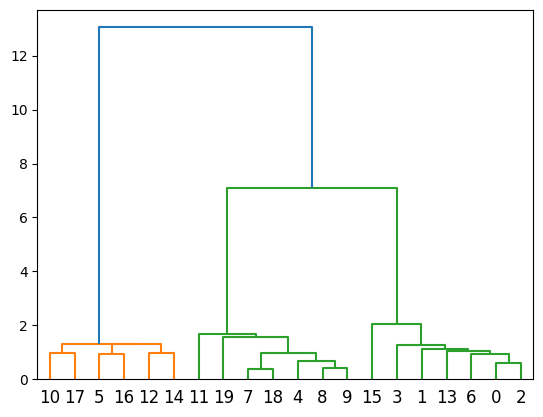

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method = 'single')
dn = dendrogram(Z)

The dendogram is designed so that the inter cluster similraty is represented on the y-axis. Upon visual inspection, we realize that three clusters is the optimal number because the height of the nodes afer three clusters only decreases slightly. Becaus of the simplicity of the dataset, the accuracy is going to be perfect.

# Part 4: Clustering Algorithms Comparison

## Question 16

- Import three images datasets as we did in previous labs: MNIST, FashionMNIST and CIFAR10. Vectorize these images to have vector input data.

In [23]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data_fashion = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

train_data_mnist = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

train_data_cifar = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)



Files already downloaded and verified


In [24]:
from sklearn.decomposition import PCA
def reshape_vectorize(X):
    length = X.shape[0]
    return list(map(lambda x: np.array(x), X.reshape(length, -1)))

In [25]:
vector_fashion = reshape_vectorize(train_data_fashion.data)
vector_fashion = PCA(n_components = 0.98).fit_transform(vector_fashion)
labels_fashion = np.array(train_data_fashion.targets)
print(np.unique(labels_fashion))

[0 1 2 3 4 5 6 7 8 9]


In [26]:
vector_mnist = reshape_vectorize(train_data_mnist.data)
vector_mnist = PCA(n_components = 0.98).fit_transform(vector_mnist)
labels_mnist = np.array(train_data_mnist.targets)
print(np.unique(labels_mnist))

[0 1 2 3 4 5 6 7 8 9]


In [27]:
vector_cifar = reshape_vectorize(train_data_cifar.data)
vector_cifar = PCA(n_components = 0.98).fit_transform(vector_cifar)
labels_cifar = np.array(train_data_cifar.targets)
print(np.unique(labels_cifar))

[0 1 2 3 4 5 6 7 8 9]


## Question 17

- Perform K-means, Hierarchical clustering and Model-based algorithms (GMM) (you all have seen these algorithms in class). You can use these algorithms from sklearn. 

NB: use images of these datasets to perform clustering, keep the labels only to assign performances of your algorithms.

In [28]:
from sklearn.model_selection import train_test_split

X_train_mnist, _, y_train_mnist, _ = train_test_split(vector_mnist, labels_mnist, stratify = labels_mnist, train_size = 1000)
X_train_fashion, _, y_train_fashion, _ = train_test_split(vector_fashion, labels_fashion, stratify = labels_fashion, train_size = 1000)
X_train_cifar, _, y_train_cifar, _ = train_test_split(vector_cifar, labels_cifar, stratify = labels_cifar, train_size = 1000)

In [29]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score

In [30]:
km = KMeans(10, n_init = 'auto')
ac = AgglomerativeClustering(10)
gm = GaussianMixture(10)

algorithms = [km, ac, gm]
algorithm_names = ['KMeans', 'Agglomerative Clustering', 'Gaussian Mixture']

X_sets = [X_train_mnist, X_train_fashion, X_train_cifar]
y_sets = [y_train_mnist, y_train_fashion, y_train_cifar]
data_sets_names = ['mnist', 'fashion', 'cifar']

In [31]:
for data_set_name, X_set, y_set in zip(data_sets_names, X_sets, y_sets):
    for algorithm, algorithm_name in zip(algorithms, algorithm_names):
        labels_pred = algorithm.fit_predict(X_set)
        accuracy_rand = rand_score(y_set, labels_pred)

        print(f"Accuracy of {algorithm_name} in {data_set_name} dataset = {accuracy_rand}")
print()

Accuracy of KMeans in mnist dataset = 0.8737117117117117
Accuracy of Agglomerative Clustering in mnist dataset = 0.9011171171171172
Accuracy of Gaussian Mixture in mnist dataset = 0.866
Accuracy of KMeans in fashion dataset = 0.8845465465465465
Accuracy of Agglomerative Clustering in fashion dataset = 0.8859039039039039
Accuracy of Gaussian Mixture in fashion dataset = 0.8847467467467467
Accuracy of KMeans in cifar dataset = 0.8217477477477477
Accuracy of Agglomerative Clustering in cifar dataset = 0.8075795795795796
Accuracy of Gaussian Mixture in cifar dataset = 0.8168508508508509



We used sklearns rand_score metric to compute the accuracy of each clustering.
From sklearn documentation: the Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

## Question 18

Asses the performance of each algorithm.

On each dataset, describe what you observe. Overall, is there any algorithms that is better? If yes, why?

From sklearn documentation: The `calinski_harabasz` index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

We will use this index for performance measurement.

In [32]:
from sklearn.metrics import calinski_harabasz_score

xaxis = range(2, 15, 1)
kmsa = [KMeans(i, n_init = 'auto') for i in xaxis]
acs = [AgglomerativeClustering(i) for i in xaxis]
gms = [GaussianMixture(i) for i in xaxis]
scores = [[], [], []]

In [33]:
def evaluate_algorithm(xaxis, algorithm_list, algorithm_name, score_list):
    for data_set_name, X_set, y_set in zip(data_sets_names, X_sets, y_sets):
        for j, algorithm in enumerate(algorithm_list):
            labels_pred = algorithm.fit_predict(X_set)
            score = calinski_harabasz_score(X_set, labels_pred)
            # print(f"Score of {algorithm_name} in {data_set_name} dataset with {xaxis[j]} clusters = {score}")
            score_list.append(score)


In [34]:
evaluate_algorithm(xaxis, kms, 'KMeans', scores[0])

In [35]:
evaluate_algorithm(xaxis, acs, 'Agglomerative', scores[1])

In [36]:
evaluate_algorithm(xaxis, gms, 'Gaussian Mixture', scores[2])

In [37]:
sc = np.array(scores).reshape(-1, 3, 13) 

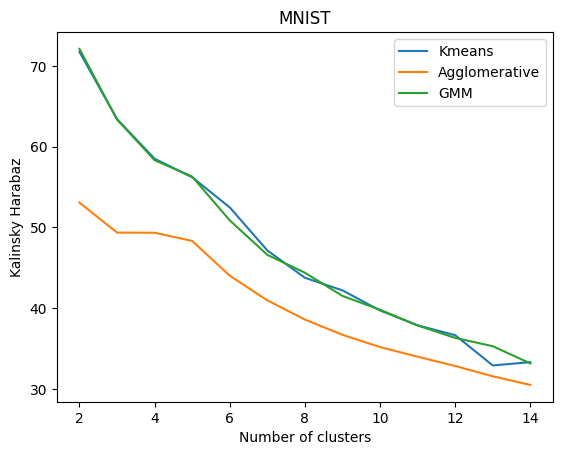

In [38]:
lab = ['Kmeans', 'Agglomerative', 'GMM']
for s, name in zip(sc, lab):
    yaxis = s[0]
    plt.plot(xaxis, yaxis, label = name)
    plt.title('MNIST')
    plt.xlabel('Number of clusters')
    plt.ylabel('Kalinsky Harabaz')
    plt.legend()

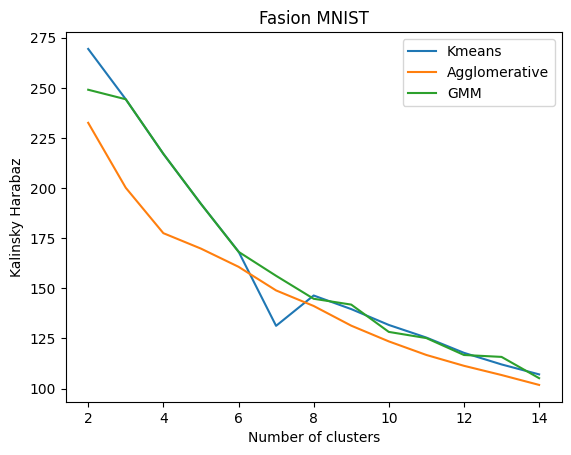

In [39]:
for s, name in zip(sc, lab):
    yaxis = s[1]
    plt.plot(xaxis, yaxis, label = name)
    plt.title('Fasion MNIST')
    plt.xlabel('Number of clusters')
    plt.ylabel('Kalinsky Harabaz')
    plt.legend()

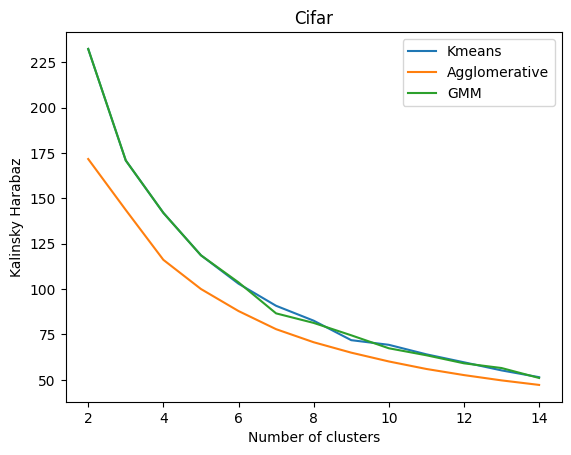

In [40]:
for s, name in zip(sc, lab):
    yaxis = s[2]
    plt.plot(xaxis, yaxis, label = name)
    plt.title('Cifar')
    plt.xlabel('Number of clusters')
    plt.ylabel('Kalinsky Harabaz')
    plt.legend()

We can observe that we do not have a clear difference between the performances of the three algorithms. If anything, the agglomerative clustering performed slightly worse than the other two based on the `calinski_harabasz_score`.

We can check that in the Fashion, MNIST and CIFAR datasets, the Gaussian Mixture and the Kmeans performed almost indistinguishably. We additionally comment that there are no clear elbows in the graph for this metric in any dataset at the 10th cluster, so we can conclude this metric is not ideal to determine the goodness of the clustering. 

## Question 19

List pros and cons of each algorithms from what you have seen during the lab.

# K-means:

Pros:

* The computational complexity of K-means is O(nki), where n is the number of data points, k is the number of clusters, and i is the number of iterations required for convergence (which is guaranteed). Empirically, by far the fastest of the algorithms during the lab.
* K-means can be used for both unsupervised and supervised learning tasks. It returns clusters which can be easily interpreted and even visualized. This simplicity makes it highly useful in some cases when you need a quick overview of the data segments.


Cons:

* K-means is sensitive to the initial positions of the centroids, which can lead to suboptimal solutions.
* K-means does not work well when the clusters have non-convex shapes.
* It can be sensitive to outliers because the centroids get dragged. 
* Requires specifying the number of clusters. So it needs hyperparameter tuning.


# Gaussian Mixture Models (GMM):
Pros:

* GMM provides a probabilistic model of the data, which allows for uncertainty quantification and outlier detection.
* GMM can handle clusters with different shapes and sizes, and can model overlapping clusters.

Cons:

* The computational complexity of GMM is O(n^3), which makes it computationally expensive for large datasets. Empirically, the slowest algorithm during the lab.
* GMM can suffer from the problem of identifiability, where multiple parameter configurations have the same likelihood.
* Requires specifying the number of clusters. So it needs hyperparameter tuning.
* From sklearn: When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood 

# Agglomerative clustering:

Pros:

* Does not require specifying the number of cluster because it provides a hierarchy.
* Agglomerative clustering can provide a hierarchy of clusters, which allows for a more nuanced understanding of the data.
* Agglomerative clustering can work with different distance metrics, which makes it more flexible than K-means or GMM.

Cons:

* The computational complexity of agglomerative clustering is O(n^3), which makes it computationally expensive for large datasets.
* Agglomerative clustering can be sensitive to the choice of distance metric and linkage criterion, which can lead to suboptimal solutions.
* Agglomerative clustering can be difficult to interpret, especially when the hierarchy of clusters is complex (which can happen when outliers are present in the data).